# Compare PTs
## Xiaonan Wang
## 23Jun2020

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import os
import smqpp
import re
import anndata
from mpl_toolkits.mplot3d import Axes3D

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

/home/xw251/miniconda3/envs/scanpy_py368/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.5.0 anndata==0.7.1 numpy==1.18.2 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1 leidenalg==0.7.0


In [8]:
adata_m1 = sc.read('./write/combat_R/CB_MPB_BM_lognorm_combatBC.h5ad')
adata_m2 = sc.read('./write/combat_scanpy/CB_MPB_BM_lognorm_combatBC.h5ad')
adata_m2 = adata_m2[adata_m1.obs_names]
adata_m3 = sc.read('./write/fastMNN_scanpy/CB_MPB_BM_lognorm_combatBC.h5ad')
adata_m3 = adata_m3[adata_m1.obs_names]

Text(0.5, 1.0, 'm1 vs m2')

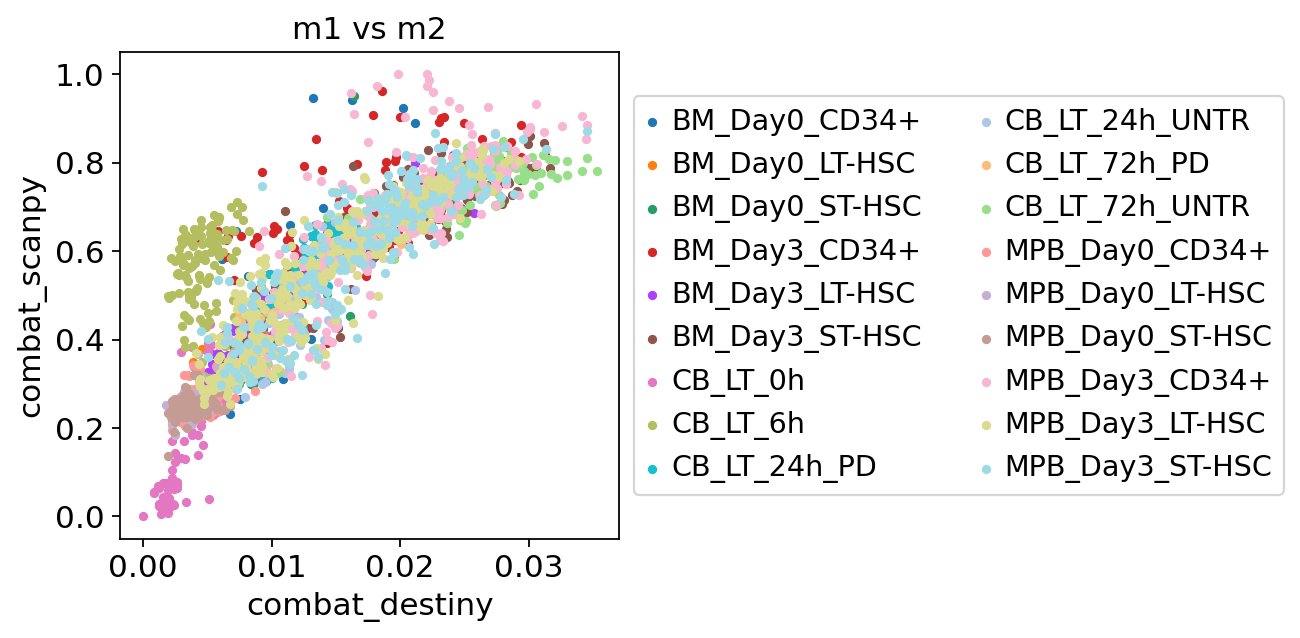

In [31]:
fig, ax = plt.subplots()
cat = adata_m1.obs['cond_comb1'].cat.categories
for i in range(len(cat)):
    idx = adata_m1.obs['cond_comb1'] == cat[i]
    ax.scatter(adata_m1.obs['destiny_pt_kenny'][idx], adata_m2.obs['dpt_pseudotime'][idx], c=sc.pl.palettes.default_20[i], label=cat[i], s=10)
    ax.grid(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
ax.set_xlabel('combat_destiny')
ax.set_ylabel('combat_scanpy')
ax.set_title('m1 vs m2')

Text(0.5, 1.0, 'm2 vs m3')

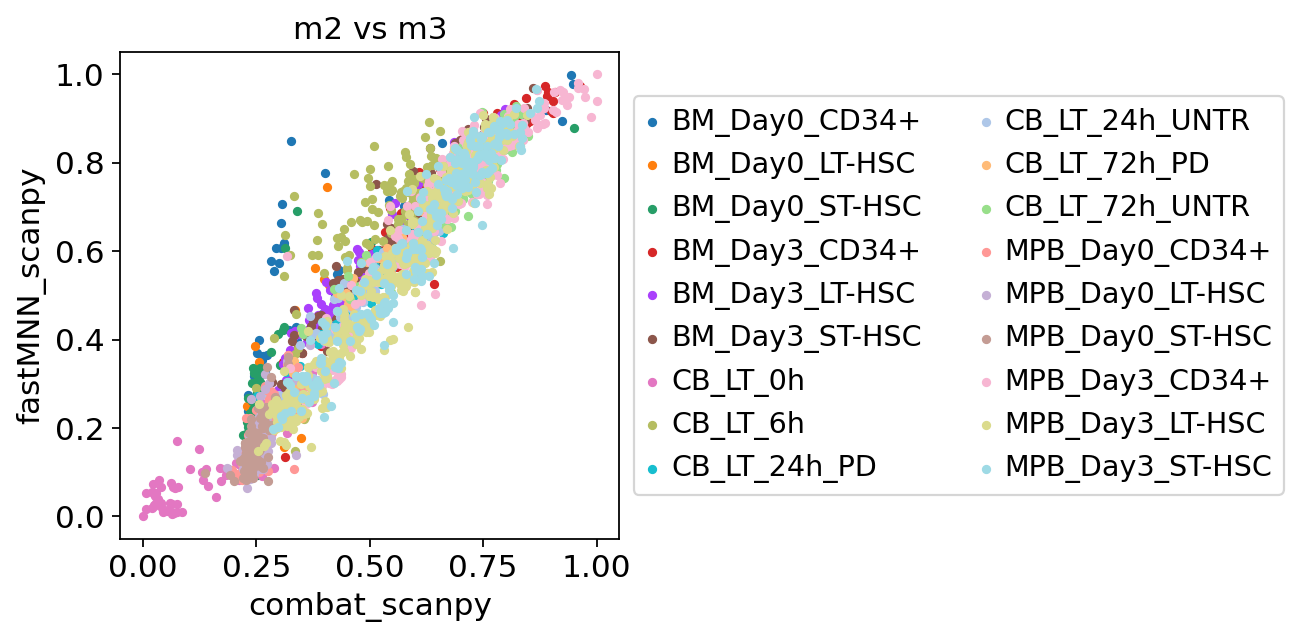

In [32]:
fig, ax = plt.subplots()
cat = adata_m1.obs['cond_comb1'].cat.categories
for i in range(len(cat)):
    idx = adata_m1.obs['cond_comb1'] == cat[i]
    ax.scatter(adata_m2.obs['dpt_pseudotime'][idx], adata_m3.obs['dpt_pseudotime'][idx], c=sc.pl.palettes.default_20[i], label=cat[i],s=10)
    ax.grid(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
ax.set_xlabel('combat_scanpy')
ax.set_ylabel('fastMNN_scanpy')
ax.set_title('m2 vs m3')

Text(0.5, 1.0, 'm1 vs m3')

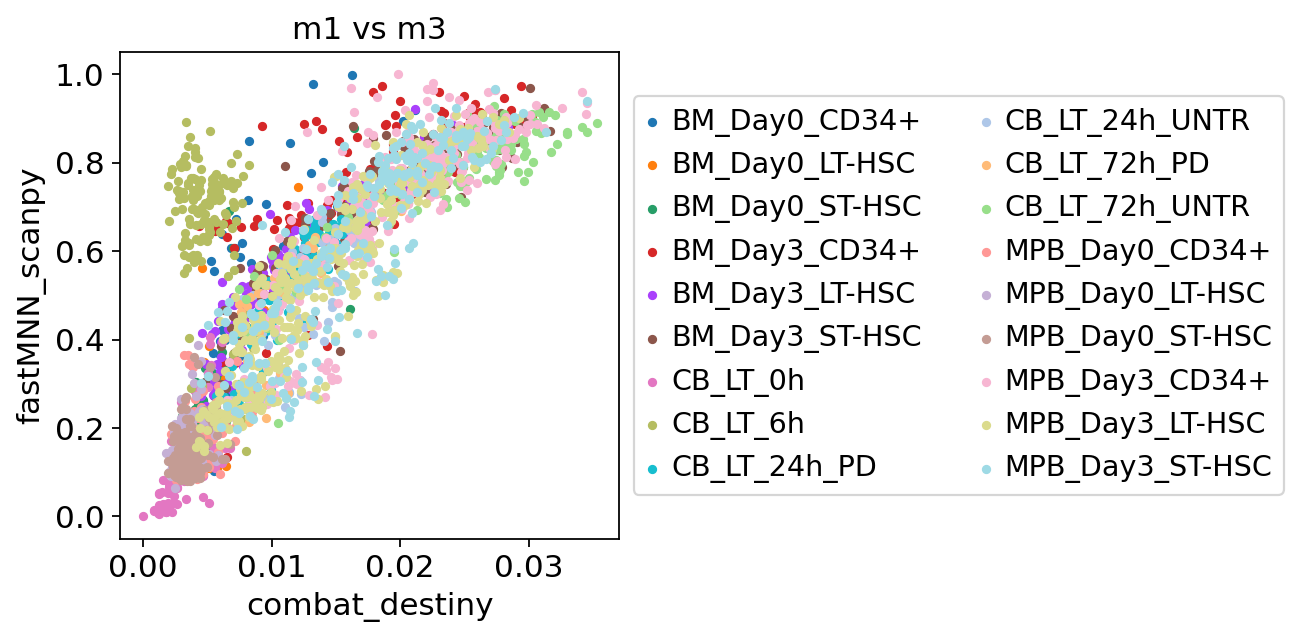

In [33]:
fig, ax = plt.subplots()
cat = adata_m1.obs['cond_comb1'].cat.categories
for i in range(len(cat)):
    idx = adata_m1.obs['cond_comb1'] == cat[i]
    ax.scatter(adata_m1.obs['destiny_pt_kenny'][idx], adata_m3.obs['dpt_pseudotime'][idx], c=sc.pl.palettes.default_20[i], label=cat[i], s=10)
    ax.grid(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
ax.set_xlabel('combat_destiny')
ax.set_ylabel('fastMNN_scanpy')
ax.set_title('m1 vs m3')